<h1> van der Pol </h1>

<h4> Essential Libraries </h4>

In [1]:
# --------------------/
%matplotlib inline
# --------------------/
import math
import numpy as np
import matplotlib.pyplot as plt

from pylab import *
from scipy import *
from ipywidgets import *

<h4> Initial Value Problem </h4>

In [62]:
def F(x):
    """
    Bour breather
    """
    a, b = 1.8, 7.3
    A, B = 4.6, 1.0 
    return np.arctan((A*np.cos(b*x)) / (B*np.cosh(a*x)))
# ------------------------------------------------------------/
def f(t, y, w):
    """
    dw/dt = d/dt(dy/dt)
    """
    return w
# ------------------------------------------------------------/
def g(t, y, w):
    """
    dy/dt = w
    """
    return 1.5*(1.0 - y**2)*w - y + 20*F(t)
# ------------------------------------------------------------/
# initial conditions
# y(0), w(0)
w, y = 1.5, 0.0

# domain
t, T, n = 0.0, 20.0, 1000

# step size
k = (T - t)/float(n)

# matrix solution
u = np.zeros((2, n))

<h4> Runge-Kutta IV </h4>

In [63]:
for i in range(n):
    """
    Runge-Kutta IV Order
    """  
    u[:,i] = y, w
    
    # first stage
    Y1 = k*f(t, y, w)
    W1 = k*g(t, y, w)
    
    # second stage
    Y2 = k*f(t + 0.5*k, y + 0.5*Y1, w + 0.5*W1)
    W2 = k*g(t + 0.5*k, y + 0.5*Y1, w + 0.5*W1)
    
    # third stage
    Y3 = k*f(t + 0.5*k, y + 0.5*Y2, w + 0.5*W2)
    W3 = k*g(t + 0.5*k, y + 0.5*Y2, w + 0.5*W2)
    
    # fourth stage
    Y4 = k*f(t + k, y + Y3, w + W3)
    W4 = k*g(t + k, y + Y3, w + W3)
    
    # update
    y = y + (Y1 + 2.0*(Y2 + Y3) + Y4)/6.0
    w = w + (W1 + 2.0*(W2 + W3) + W4)/6.0
    
    t = t + k

<h4> Plots </h4>

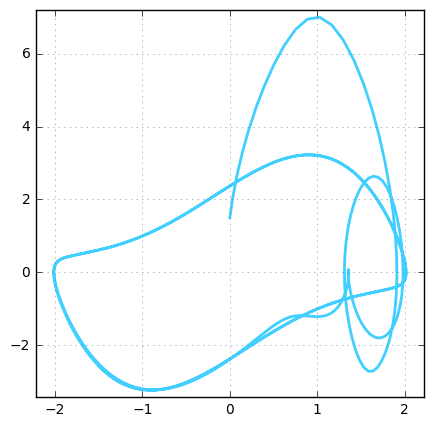

In [64]:
def evolution(step):
    l = 2e-1
    plt.figure(figsize=(5,5))
    plt.plot(u[0,:step], u[1,:step], lw = 2, alpha = 0.75, color = 'deepskyblue')
    plt.grid(color='lightslategray', alpha=0.90)
    plt.xlim(u[0,:].min() - l, u[0,:].max() + l)
    plt.ylim(u[1,:].min() - l, u[1,:].max() + l)
# --------------------------------------------------/
# interactive plot
step = widgets.IntSlider(min=0, max=n-1, description='step')
interact(evolution, step=step)

> NB property of [FVNTS](http://www.fvnts.ch)